# Membangun Jaringan Syaraf Tiruan dari Awal - Pengenalan
Artikel kali ini sedikit berbeda karena sebelumnya banyak membahas ke arah jaringan komputer, devops, dan semisalnya maka untuk kali ini saya akan membahas bagaimana implementasi jaringan syaraf tiruan dengan menggunakan python. Kenapa kok sekarang membahas jaringan yang berbeda dari biasanya ?. Itu di luar batasan masalah kalau istilah risetnya. Akan saya bahas nanti di artikel yang berbeda. Oke kita lanjutkan pembahasan.

Saya berharap kawan-kawan sebelumnya sudah memahami kalkulus dasar dan konsep dari  pembelajaran mesin seperti klasifikasi dan regularisasi. Walaupun secara ideal akan lebih baik jika sudah memahami bagaimana teknik optimasi. Akan tetapi tidak masalah jika memang sama sekali belum paham tapi minimal ada ketertarikan untuk tahu lebih banyak maka itu sudah lebih baik. Semoga artikel kali ini cukup menarik.

Saya punya prinsip jika ingin mengetahui sebuah algoritma maka menulisnya dari awal dengan kode akan mempercepat pemahaman. Hal ini berlaku juga dengan mempelajari jaringan syaraf tiruan. Dengan menuliskan kodenya dari awal akan membantu kita untuk memahami bagaimana sebuah jaringan syaraf tiruan bekerja dan selanjutnya kita implementasi bagaimana membuat model yang efektif. 

In [1]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

## A. Membangkitkan Data
Sebelumnya kita akan membangkitkan data untuk rekayasa dan modifikasi. Untuk membangkitkan data kita bisa menggunakan pustaka dari scikit-learn. Untuk yang ini kita tidak perlu memprogram dari awal. Kita akan menggunakan fungsi make_moons dari data yang sudah ada di scikit-learn. Apa yang ditampilkan pada artikel ini berupa potongan-potongan kode saja. Untuk lengkapnya silakan merujuk pada github saya.

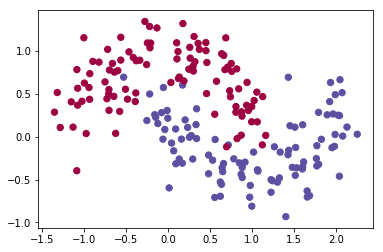

In [2]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

Dataset pada Gambar 1 yang telah dibangkitkan memiliki dua buah kelas yang diwakili dengan titik warna biru dan warna merah. Karena ini hanyalah sebuah contoh data. Kita bisa juga menganalogikan warna biru adalah pasien yang sehat dan warna merah adalah pasien yang terdiagnosis terkena penyakit dengan sumbu x dan y merupakan hasil pengukuran secara medis. 

Tujuan kita adalah bagaimana melatih classifier agar dapat memprediksi mana yang sakit dan mana yang tidak dengan koordinat x dan y. Jika diperhatikan dengan baik plot Gambar 1, data bercampur dan tidak sepenuhnya terpisah dengan jelas (linearly separable) sehingga kita tidak bisa menggaris dengan garis lurus terhadap kedua kelas. Hasil kesimpulan ini membuktikan, kita tidak bisa menggunakan classifier yang bersifat linier seperti Logistic Regression tidak bisa dilakukan kecuali dilakukan secara manual non-linier.

Dari sini kita juga dapat mengetahui salah satu keunggulan dari jaringan syaraf tiruan adalah kita tidak perlu khawatir untuk melakukan seleksi fitur. Lapisan tersembunyi (hidden layer) dari sebuah jaringan syaraf akan melakukannya untuk kita.

## B. Logistic Regression
Untuk menjelaskan bahwa Logistic Regression seperti yang disebutkan diatas tidak bisa mengklasifikasikan maka gambar berikut akan lebih memperjelas maksudnya. Kode masih menggunakan scikit-learn.

In [3]:
# Melatih data dengan algoritma Logistic Regression
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

/data/Research/python3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [4]:
# Fungsi untuk untuk plotting hasil training dan prediksi
def plot_decision_boundary(pred_func):
    # Konfigurasi nilai minimum dan maksimum
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Prediksi nilai untuk keseluruhan
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plotting tren data training
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5,1,'Logistic Regression')

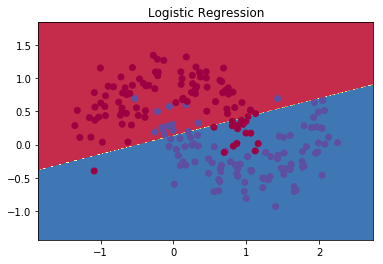

In [5]:
# Plot logistic regression
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

Perhatikan baik-baik Gambar 2 diatas. Algoritma Logistic Regression telah mempelajari data yang diberikan dan mencoba untuk memisahkan mana data yang tergolong berwarna biru dan mana yang berwarna merah dengan sebuah garis lurus. Jika diperhatikan dengan seksama kita akan melihat ada data berwarna biru yang dianggap merah begitu pula sebaliknya. Sehingga data yang ada tidak cocok menggunakan Logistic Regression.

## C. Melatih Jaringan Syaraf Tiruan
Selanjutnya kita akan mencoba menggunakan jaringan syaraf tiruan dengan membangun tiga buah lapisan jaringan, dengan satu buah lapisan input, satu buah lapisan tersembunyi, dan satu buah lapisan keluaran. Jumlah titik ditentukan sesuai dengan besar dimensi data yang dimiliki dalam hal ini data yang dibangkitkan adalah 2 maka kita gunakan 2.

Hal yang sama pada lapisan keluaran ditentukan oleh berapa kelas yang dimiliki data kita. Jumlahnya masih sama 2 yakni biru (tidak sakit) dan merah (sakit). Lapisan input pun juga ada 2 yang mewakili sumbu x dan y dengan keluaran bisa 0 (tidak sakit) dan 1 (sakit). Jika digambarkan kurang lebih sebagai berikut:
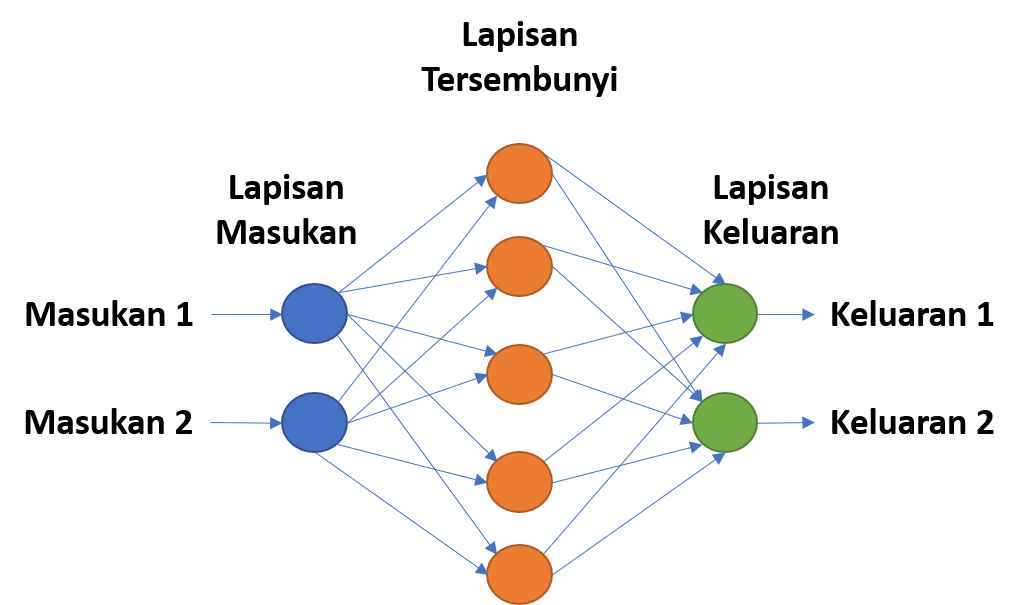


Bagaimana dengan lapisan tersembunyi ?. Semakin besar tentu saja akan semakin komplek dan tentu saja konsekuensinya adalah membutuhkan komputasi yang lebih untuk melakukan prediksi dan pembelajaran. Catatan yang perlu diperhatikan juga adalah semakin besar parameter yang digunakan akan berpotensi overfitting. Penjelasan mudahnya, overfitting adalah prediksi yang berjalan baik pada data yang kita miliki dan akurasi tinggi. Akan tetapi ketika dihadapkan pada data lain maka akan menurun akurasinya. Penjelasan overfitting akan saya coba jelaskan pada artikel lainnya dengan lebih detil.

Lalu bagaimana memilih lapisan yang tersembunyi ?. Ada beberapa rekomendasi yang bisa digunakan dan hal ini tentu saja tergantung permasalahan yang ada. Pemilihan jumlah lapisan tersembunyi lebih bersifat seni (ini debatable). Kita akan menerangkan lebih lanjut.

Dalam jaringan syaraf, dibutuhkan juga yang namanya fungsi aktivasi untuk lapisan tersembunyi. Fungsi aktivasi ini bekerja dari lapisan masukan menuju keluaran. Beberapa diantara fungsi aktivasi yang biasa digunakan diantaranya adalah tanh, sigmoid, relu. Pada kasus ini kita akan menggunakan tanh. 

## 	D. Bagaimana jaringan syaraf tiruan melakukan prediksi 
Prediksi pada jaringan syaraf tiruan akan menggunakan propagasi ke depan yang merupakan kumpulan perkalian beberapa matrix dan implementasi dari fungsi aktivasi diatas. Jika x adalah input dari 2 dimensi maka kita dapat mendefinisikan $\hat{y}$  (prediksi data) sebagai berikut:

$$
\begin{aligned}
z_1 = xW_1 + b_1 \\
a_1 = \tanh(z_1) \\
z_2 = a_1W_2 + b_2 \\
a_2 = \hat{y} = \mathrm{softmax}(z_2)
\end{aligned}
$$

$z_i$ adalah jumlah bobot pada lapisan masukan $i$ dan $a_i$ adalah lapisan keluaran $i$ setelah implementasi fungsi aktivasi. $W_1, b_1, W_2, b_2$ adalah parameter dari jaringan yang harus dipelajari dari data. Ini bisa dianalogikan dengan transformasi matrix antar lapisan pada jaringan. Melihat perkalian matrix diatas, kita dapat mengetahui dimensi dari matrix yang ada. Apabila kita menggunakan 100 neuron pada lapisan tersembunyi maka $W_1 \in \mathbb{R}^{2\times100}$, $b_1 \in \mathbb{R}^{100}$, $W_2 \in \mathbb{R}^{100\times2}$, $b_2 \in \mathbb{R}^{2}$. 

## E. Fungsi Rugi
Pada pembelajaran mesin dengan menggunakan jaringan syaraf tiruan kita mengenal yang namanya fungsi rugi (loss function). Fungsi rugi ini adalah perbedaan antara hasil keluaran dan prediksi keluaran. Ada beberapa metode yang digunakan untuk menentukan fungsi rugi. Pada implementasi kali ini akan menggunakan Cross Entropy Loss / Negative Log Likelihood. Ini adalah metode yang umum digunakan untuk permasalahan klasifikasi.

## F. Implementation
Selanjutnya kita akan melakukan implementasi dengan membuat beberapa variabel sebagai berikut.

In [6]:
training_set_size = len(X) # Besar training set 
nn_input_dim = 2 # dimensi lapisan masukan 
nn_output_dim = 2 # dimensi lapisan keluaran
learning_rate = 0.01 
regularization = 0.01

Kemudian implementasi dari fungsi rugi pada data yang sudah dibangkitkan. 

In [7]:
# Menghitung fungsi rugi
def loss_func(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # menghitung fungsi rugi
    correct_logprobs = -np.log(probs[range(training_set_size), y])
    data_loss = np.sum(correct_logprobs)
    data_loss += regularization / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./training_set_size * data_loss

Kita juga membuat sebuah fungsi untuk menghitung prediksi keluaran sebagai berikut.

In [8]:
# Prediksi output (0 atau 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
    return np.argmax(probs, axis = 1)

Berikut adalah fungsi melatih dari jaringan. Fungsi ini menggunakan gradient descent. 

In [9]:
# Membangun model dan mengembalikan hasil model
# - nn_hdim: jumlah neuron pada lapisan tersembunyi
# - num_gd: jumlah yang melewati training data 
# - print_loss: jika True akan menampilkan nilai rugi setiap iterasi per 1000 kali
def build_model(nn_hdim, num_gd=20000, print_loss=False):
    
    # Inisialisasi parameter.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # mengembalikan hasil model
    model = {}
    
    # Gradient descent untuk setiap batch
    for i in range(0, num_gd):

        # Propagasi ke depan
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Propagasi ke belakang
        delta3 = probs
        delta3[range(training_set_size), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # regularization
        dW2 += regularization * W2
        dW1 += regularization * W1

        # perbarui parameter gradient descent
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
        
        # Memberikan nilai parameter baru
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Menampilkan nilai fungsi rugi (opsional)
        if print_loss and i % 1000 == 0:
          print("Rugi selepas iterasi ke %i: %f" %(i, loss_func(model)))
    
    return model

## G. Jaringan syaraf tiruan dengan 3 buah lapisan tersembunyi
Uji coba jaringan syaraf dengan menggunakan 3 buah lapisan tersembunyi.

Rugi selepas iterasi ke 0: 0.432387
Rugi selepas iterasi ke 1000: 0.068947
Rugi selepas iterasi ke 2000: 0.068888
Rugi selepas iterasi ke 3000: 0.070752
Rugi selepas iterasi ke 4000: 0.070748
Rugi selepas iterasi ke 5000: 0.070751
Rugi selepas iterasi ke 6000: 0.070754
Rugi selepas iterasi ke 7000: 0.070756
Rugi selepas iterasi ke 8000: 0.070757
Rugi selepas iterasi ke 9000: 0.070758
Rugi selepas iterasi ke 10000: 0.070758
Rugi selepas iterasi ke 11000: 0.070758
Rugi selepas iterasi ke 12000: 0.070758
Rugi selepas iterasi ke 13000: 0.070758
Rugi selepas iterasi ke 14000: 0.070758
Rugi selepas iterasi ke 15000: 0.070758
Rugi selepas iterasi ke 16000: 0.070758
Rugi selepas iterasi ke 17000: 0.070758
Rugi selepas iterasi ke 18000: 0.070758
Rugi selepas iterasi ke 19000: 0.070758


Text(0.5,1,'Plot dengan lapisan tersembunyi sebanyak 3')

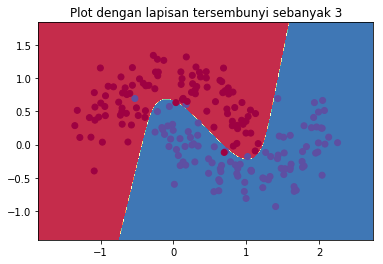

In [10]:
# Membangun model jaringan dengan tiga buah lapisan tersembunyi
model = build_model(3, print_loss=True)

# menampilkan plot
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Plot dengan lapisan tersembunyi sebanyak 3")

Hasilnya cukup baik. Model yang dibangun bisa menentukan batas dan membagi sesuai dengan kelas.

## Modifikasi Jumlah Lapisan Tersembunyi
Contoh diatas kita menggunakan lapisan tersembunyi sebanyak 3. Berikut kita akan lakukan uji coba dengan menggunakan lapisan tersembunyi 1, 2, 3, 4, 5, 20, 50.

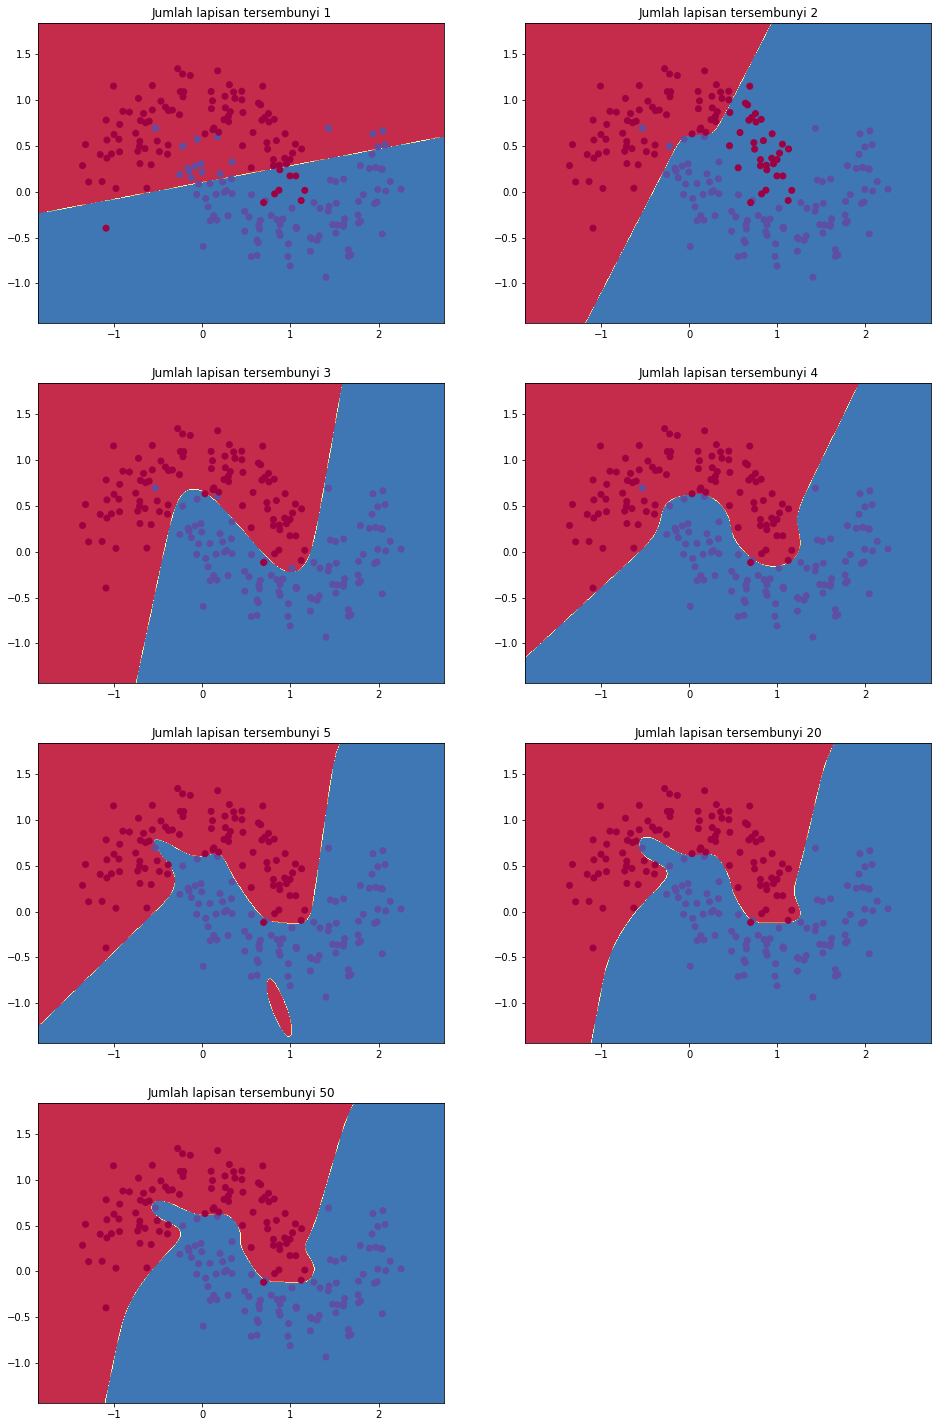

In [11]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Jumlah lapisan tersembunyi %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

Dari hasil diatas kita temukan dengan menggunakan dimensi kecil kita bisa melihat tren dari data yang ada akan tetapi jika dimensi yang digunakan terlalu besar akan menyebabkan overfitting. 

Selamat mencoba 